In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [4]:
df= pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [5]:
df=df.dropna()

In [6]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


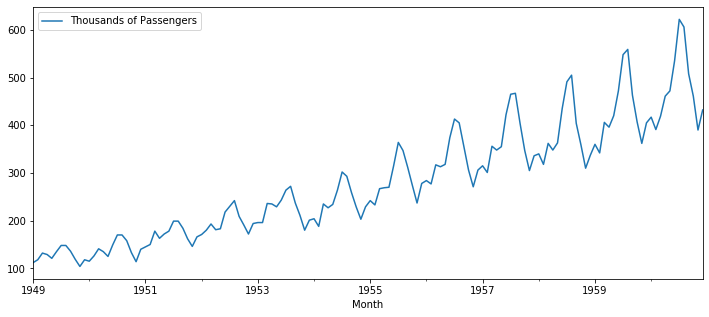

In [11]:
df[['Thousands of Passengers']].plot(figsize=(12,5))

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
result= seasonal_decompose(df['Thousands of Passengers'], model='multiplicative')

In [15]:
result.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: Thousands of Passengers, Length: 144, dtype: float64

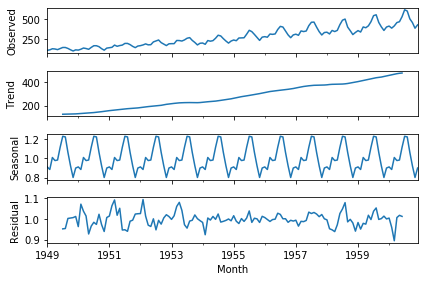

In [19]:
result.plot();


# Holt Winters

In [20]:
#to see the frequency of table
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [21]:
#frequency is null. Need to change it to month ie MS
df.index.freq='MS'

In [22]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [23]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [27]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [28]:
span=12
alpha=2/(span+1)

In [29]:
model=SimpleExpSmoothing(df['Thousands of Passengers'])

In [30]:
fitted= model.fit(smoothing_level=alpha, optimized= False)

In [31]:
df['ses12']=fitted.fittedvalues

In [32]:
df.head()

,Thousands of Passengers,ses12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.000000
1949-03-01,132,112.923077
1949-04-01,129,115.857988
1949-05-01,121,117.879836
